In [875]:
import pandas as pd
import numpy as np

In [876]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S


In [877]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [878]:
data.dropna(inplace=True)

In [879]:
x = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

0.7213114754098361

0.6882113821138212

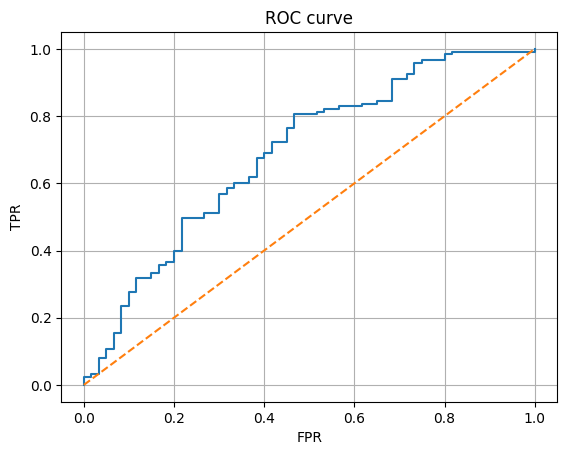

In [880]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(x, y)
display(model.score(x, y))

y_pred = model.predict_proba(x)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred)

display(float(roc_auc_score(y, y_pred)))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.grid(True)
plt.show()

In [881]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S


Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.  
Обосновываю :)  
Удаленные признаки являются уникальными для каждого пассажира 🤤
cabin имеет слишком много пропущенных и класс дублируется в pclass

In [882]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', ], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.  
с cabin 80%

In [883]:
a = data.dropna()
len(a) / len(data)

0.7991021324354658

In [884]:
data.loc[data['Embarked'].isna(), 'Embarked'] = 'S'

In [885]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

In [886]:
data['Age'] = data['Age'].astype(int)

In [887]:
data[data['Age'] == 0] = data['Age'].mode()[0]

In [888]:
data['Age'].describe()

count   891.000000
mean     28.739618
std      12.966924
min       1.000000
25%      22.000000
50%      24.000000
75%      35.000000
max      80.000000
Name: Age, dtype: float64

In [889]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [890]:
data[data['Survived'] > 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
78,24,24,24,24,24,24,24.000000,24
305,24,24,24,24,24,24,24.000000,24
469,24,24,24,24,24,24,24.000000,24
644,24,24,24,24,24,24,24.000000,24
755,24,24,24,24,24,24,24.000000,24
803,24,24,24,24,24,24,24.000000,24
831,24,24,24,24,24,24,24.000000,24


In [891]:
pd.DataFrame(data.value_counts(subset=['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])).head(50)

count
Survived Pclass Sex    SibSp Parch Embarked       
0        3      male   0     0     S           177
         2      male   0     0     S            61
         1      male   0     0     S            35
         3      male   0     0     C            28
                                   Q            27
1        2      female 0     0     S            25
         3      male   0     0     S            25
                female 0     0     Q            19
         1      male   0     0     S            17
                female 0     0     C            17
                                   S            16
0        3      female 0     0     S            16
1        1      female 1     0     C            15
0        3      male   1     0     S            15
         1      male   0     0     C            15
1        3      female 0     0     S            14
         1      female 1     0     S            13
0        2      male   1     0     S            10
         1      male   1     0     S             9
         3      female 1     0     S             8
1        1      male   0     0     C             8
         2      female 1     1     S             8
                       0     1     S             7
24       24     24     24    24    24            7
1        2      female 1     0     S             7
                male   0     0     S             6
         1      female 0     1     S             6
0        3      male   2     0     S             6
                       1     1     S             6
                female 0     0     Q             6
1        1      male   1     0     C             5
         3      female 1     0     S             5
                male   0     0     C             5
         2      female 0     2     S             5
         1      male   1     0     S             5
0        3      female 3     1     S             5
                male   4     1     S             5
1        1      female 0     2     S             4
                       1     1     S             4
         2      male   1     1     S             4
                female 1     2     S             4
0        3      male   4     1     Q             4
                       1     0     Q             4
1        1      female 0     1     C             4
0        3      male   8     2     S             4
                       5     2     S             4
                female 4     2     S             4
         2      male   1     1     S             4
         1      male   0     1     C             4
1        3      female 1     0     Q             4

In [892]:
data.drop(data[data['Survived'] > 1].index, axis=0, inplace=True)
data.drop(data[data['Fare'] > 300].index, axis=0, inplace=True)

<Axes: xlabel='Pclass', ylabel='count'>

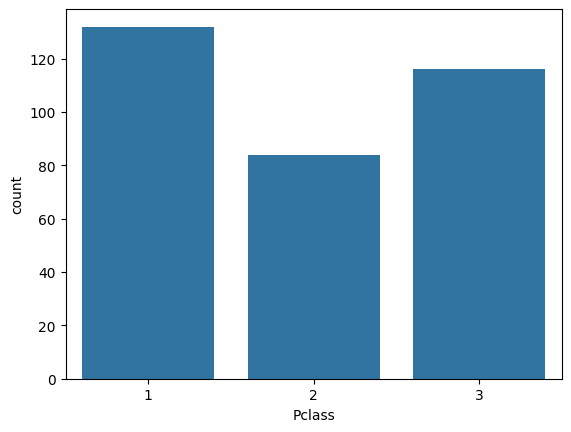

In [893]:
import seaborn as sns

data_survived = data[data['Survived'] == 1]
sns.countplot(data=data_survived, x='Pclass')

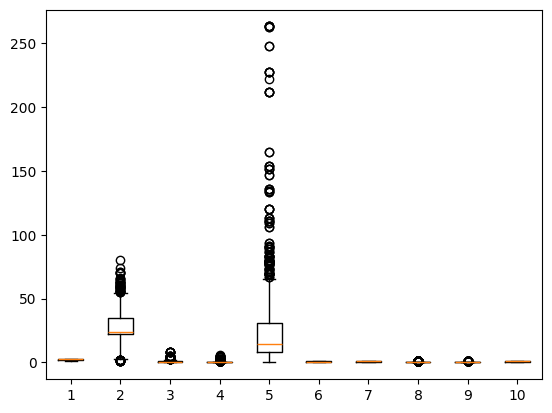

In [894]:
y = data['Survived']
x = data.drop(['Survived'], axis=1)
x = pd.get_dummies(x)
plt.boxplot(x)
plt.show()

In [895]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
x['Age'] = scaler.fit_transform(x[['Age']])
x['Fare'] = scaler.fit_transform(x[['Fare']])
pd.options.display.float_format = '{:.6f}'.format
display(x.describe())
display(x)

,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,881.000000,881.000000
mean,2.313280,-0.000000,0.520999,0.374574,-0.000000
std,0.834984,1.000568,1.105699,0.805091,1.000568
min,1.000000,-2.131639,0.000000,0.000000,-0.742818
25%,2.000000,-0.518787,0.000000,0.000000,-0.550702
50%,3.000000,-0.365182,0.000000,0.000000,-0.391126
75%,3.000000,0.479645,1.000000,0.000000,0.011458
max,3.000000,3.935755,8.000000,6.000000,5.656363


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.518787,1,0,-0.566415,False,True,False,False,True
1,1,0.710052,1,0,0.991611,True,False,True,False,False
2,3,-0.211577,0,0,-0.549991,True,False,False,False,True
3,1,0.479645,1,0,0.549184,True,False,False,False,True
4,3,0.479645,0,0,-0.546950,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,-0.134775,0,0,-0.426509,False,True,False,False,True
887,1,-0.749194,0,0,-0.012874,True,False,False,False,True
888,3,-0.365182,1,2,-0.172245,True,False,False,False,True
889,1,-0.211577,0,0,-0.012874,False,True,True,False,False


0.8013620885357549

0.8538306230386025

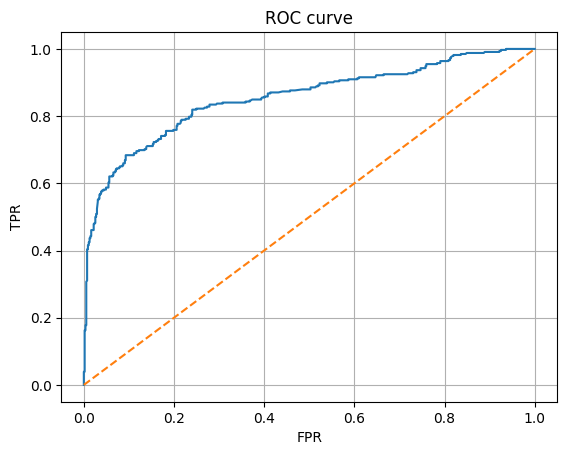

In [896]:
model = LogisticRegression()
model.fit(x, y)
display(model.score(x, y))

y_pred = model.predict_proba(x)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred)

display(float(roc_auc_score(y, y_pred)))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.grid(True)
plt.show()